# Sistem Penunjang Keputusan Untuk Menentukan Status Gizi Balita Menggunakan Metode Fuzzy Tsukamoto

Import Modul

Implementasi fuzzy dengan python menggunakan modul:

   - Sci-Kit Fuzzy, untuk operasi logika fuzzy
   - Numpy, untuk pengoperasian matematika



In [1]:
#memanggil library yang akan kita gunakan
#skfuzzy adalah library fuzzy logic pada python yang bekerja dengan numpy array
import numpy as np                    #import numpy gunakan np untuk menggunakan library ini
import skfuzzy as fuzz                #import library fuzzy gunakan fuzz untuk menggunkaan library ini
from skfuzzy import control as ctrl   #panggil library control dari skfuzzy gunakan ctr untuk menggunakan library ini

# 1. Fuzzyfikasi
Fuzzifikasi yaitu suatu proses untuk mengubah suatu masukan dari bentuk tegas (crisp) menjadi fuzzy (variabel linguistik) yang biasanya disajikan dalam bentuk himpunan-himpunan fuzzy dengan suatu fungsi kenggotaannya masing-masing.

Inputan terdiri dari tiga variabel yaitu usia, berat badan dan tinggi badan, dimana setiap variabel akan disusun domain himpunan fuzzy berdasarkan domain tersebut, selanjutnya ditentukan fungsi keanggotaan dari masing-masing variabel.

   - Untuk variabel input usia memiliki tiga kriteria fuzzy tahap1(0-24), sedang(12-36) dan banyak(24-60).
   - Variabel input berat badan memiliki tiga kriteria fuzzy kurang berat(0-13), normal(7-19) dan berat lebih(13-25).

   - Sedangkan untuk variabel input tinggi badan memiliki tiga kriteria fuzzy pendek(0-75),normal(49-101) dan tinggi(75-124).

   - Untuk variabel output nilai gizi mempunyai 5 kriteria fuzzy gizi buruk(0-48), gizi kurang(43-53), normal (48-70), gizi lebih(53-83), obesitas(70-123).



In [2]:
#membuat 4 variabel fuzzy, 3 sebagi input dan 1 output
US = ctrl.Antecedent(np.arange(0, 61, 1), 'Usia')#variabel usia dengan nilai 0 sampai 60 dengan range 1
BB = ctrl.Antecedent(np.arange(0, 29, 1), 'Berat Badan')#variabel berat badan dengan nilai 0 sampai 28 dengan range 1
TB = ctrl.Antecedent(np.arange(0,121,1), 'Tinggi Badan')#variabel tinggi badan dengan nilai 0 sampai 120 dengan range 1
NG = ctrl.Consequent(np.arange(0,123,1), 'Nilai Gizi')#variabel nilai gizi dengan nilai 0 sampai 123 dengan range 1

- ctrl.Atecedent sebagai input pada data fungsi keanggotaan
- ctrl.Consequent sebagai input pada data fungsi keluaran
- np.arange sebagai range setiap nilai

- Persamaan untuk variabel US

$Tahap 1 = 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \leq 12 \\
       {24-x \over 12} & \mbox{; } 12 < x  < 24 \\
       0 & \mbox{; } x \geq 24
    \end{array}
\right.$

$Tahap 2= 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 12 \ atau \ x geq 36 \\
       {x-12 \over 12} & \mbox{; } 12 < x < 24 \\
       {36-x\over 12} & \mbox{; } 24 < x < 36 \\
    \end{array}
\right.$

$Tahap 3= 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 24 \\
       {x-24 \over 12} & \mbox{; } 24 < x < 36 \\
       1 & \mbox{; } x \geq  36
    \end{array}
\right.$

- Membuat membership function veriabel US untuk usia

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


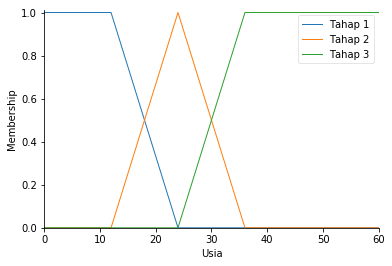

In [3]:
US['Tahap 1'] = fuzz.trapmf(US.universe, [0, 0, 12, 24])#membership function tahap 1,dalam bentuk trapesium dengan nilai 0-24
US['Tahap 2'] = fuzz.trimf(US.universe, [12, 24, 36])#membership function tahap 2,dalam bentuk segitiga dengan nilai 12-36
US['Tahap 3'] = fuzz.trapmf(US.universe, [24, 36, 60, 60])#membership function tahap 3,dalam bentuk trapesium dengan nilai 24-60


US.view()

- Persamaan untuk variabel BB

$kurangberat= 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \leq 7 \\
       {13-x \over 6} & \mbox{; } 7 < x < 13 \\
       0 & \mbox{; } x \geq 13 \\
    \end{array}
\right.$

$normal= 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 7 \ atau \ x geq 19 \\
       {x-7 \over 5} & \mbox{; } 7 < x < 13 \\
       {19-x\over 6} & \mbox{; } 13 < x < 19 \\
    \end{array}
\right.$

$beratlebih= 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 13 \\
       {x-13 \over 6} & \mbox{; } 13 < x < 19 \\
       1 & \mbox {; } x \geq 19 \\
    \end{array}
\right.$

- Membuat membership function variabel BB untuk berat badan

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


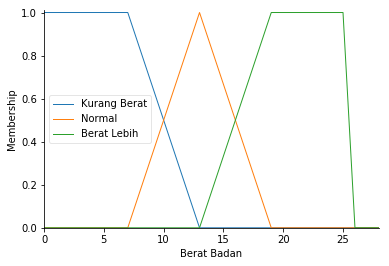

In [4]:
BB['Kurang Berat'] = fuzz.trapmf(BB.universe, [0,0,7,13])#membership function kurang berat,dalam bentuk trapesium dengan nilai 0-13
BB['Normal'] = fuzz.trimf(BB.universe, [7,13,19])#membership function normal,dalam bentuk segitiga dengan nilai 7-19
BB['Berat Lebih'] = fuzz.trapmf(BB.universe, [13,19,25,25])#membership function berat lebih, dalam bentuk trapesium dengan nilai 13-25

BB.view()

- Persamaan untuk varibel TB

$pendek= 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \leq 49 \\
       {75-x \over 26} & \mbox{; } 49 < x < 75 \\
       0 & \mbox{; } x \geq 75 \\
    \end{array}
\right.$

$normal= 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 49 \ atau \ x geq 101 \\
       {x-49\over 26} & \mbox{; } 49 < x < 75 \\
       {101-x\over 26} & \mbox{; } 75 < x < 101 \\
    \end{array}
\right.$

$tinggi= 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 75 \\
       {x-75 \over 26} & \mbox{; } 75 < x < 101 \\
       1 & \mbox{; } x \geq 101 \\
    \end{array}
\right.$

- Membuat membership function varibel TB untuk tinggi badan

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


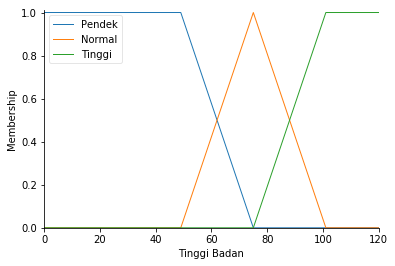

In [5]:
TB['Pendek'] = fuzz.trapmf(TB.universe, [0,0,49,75])#membership function pendek,dalam bentuk trapesium dengan nilai 0-75
TB['Normal'] = fuzz.trimf(TB.universe, [49,75,101])#membership function normal,dalam bentuk segitiga dengan nilai 49-101
TB['Tinggi'] = fuzz.trapmf(TB.universe, [75,101,124,124])#membership function tinggi,dalam bentuk trapesium dengan nilai 75-124

TB.view()

- Persamaan untuk varibel TB

$gizi buruk= 
\left\{
    \begin{array}{ll}
       1 & \mbox{; } x \leq 43 \\
       {55-x \over 8} & \mbox{; } 43 < x < 55 \\
       0 & \mbox{; } x \geq 55 \\
    \end{array}
\right.$

$gizi kurang= 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 43 \ atau \mbox{}  \geq 70 \\
       {x-43\over 8} & \mbox{; } 43 < x < 55 \\
       {55-x\over 15} & \mbox{; } 55 < x < 70 \\
    \end{array}
\right.$

$normal= 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 55 \ atau \mbox{}  \geq 80 \\
       {x-55\over 15} & \mbox{; } 55 < x < 70 \\
       {70-x\over 10} & \mbox{; } 70 < x < 80 \\
    \end{array}
\right.$

$gizi lebih= 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 70 \ atau \mbox{}  \geq 95 \\
       {x-70\over 10} & \mbox{; } 70 < x < 80 \\
       {80-x\over 15} & \mbox{; } 80 < x < 95 \\
    \end{array}
\right.$

$tinggi= 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 80 \\
       {x-80 \over 15} & \mbox{; } 80 < x < 95 \\
       1 & \mbox{; } x \geq 95 \\
    \end{array}
\right.$

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


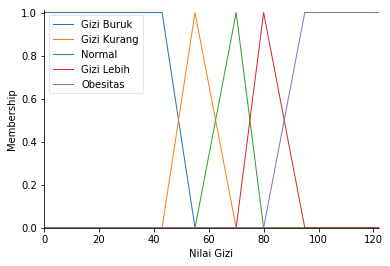

In [6]:
NG['Gizi Buruk'] = fuzz.trapmf(NG.universe, [0,0,43,55])#membership function gisi buruk, dalam bentuk trapesium dengan nilai 0-48
NG['Gizi Kurang'] = fuzz.trimf(NG.universe, [43,55,70])#membership function gizi kurang,dalam bentuk segitiga dengan nilai 43-53
NG['Normal'] = fuzz.trimf(NG.universe, [55,70,80])#membership function normal,dalam bentuk segitiga dengan nilai 48-70
NG['Gizi Lebih'] = fuzz.trimf(NG.universe, [70,80,95])#membership function gizi lebih,dalam bentuk segitiga dengan nilai 53-80
NG['Obesitas'] = fuzz.trapmf(NG.universe, [80,95,123,123])#membership function obesitas,dalam bentuk trapesium dengan nilai 70-123

NG.view()

# 2. Rule Base
Rules (aturan-aturan), merupakan pengetahuan procedural
- Menghubungkan informasi yang diberikan dengan tindakan (action)
- Struktur rule, secara logika menghubungkan satu atau lebih antecedent (atau premises) yang berada pada bagian IF, dengan satu atau lebih consequents (atau conclusions/kesimpulan) pada bagian THEN.

Membuat aturan untuk menentukan nilai gizi, karena input ada 3 dan setiap input mempunyai tiga kondisi maka saya membuat 27 aturan atau 3^3

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x96763c8>)

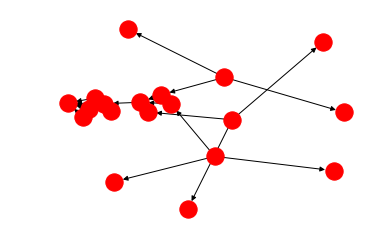

In [7]:
Rule1 = ctrl.Rule (US ['Tahap 1'] & BB ['Kurang Berat'] & TB ['Pendek'], NG ['Gizi Kurang'])
Rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa6d96d8>)

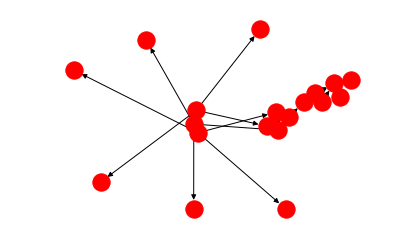

In [8]:
Rule2 = ctrl.Rule (US ['Tahap 1'] & BB ['Kurang Berat'] & TB ['Normal'], NG ['Gizi Kurang'])
Rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa748ef0>)

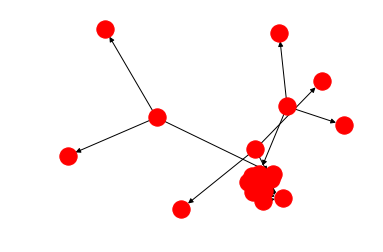

In [9]:
Rule3 = ctrl.Rule (US ['Tahap 1'] & BB ['Kurang Berat'] & TB ['Tinggi'], NG ['Gizi Kurang'])
Rule3.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x95d8208>)

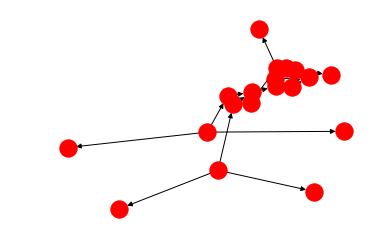

In [10]:
Rule4 = ctrl.Rule (US ['Tahap 2'] & BB ['Kurang Berat'] & TB ['Pendek'], NG ['Gizi Buruk'])
Rule4.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x94e7c88>)

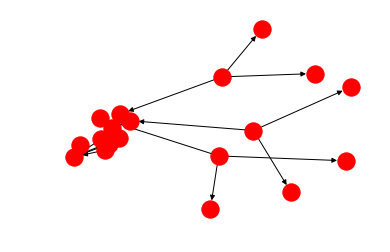

In [11]:
Rule5 = ctrl.Rule (US ['Tahap 2'] & BB ['Kurang Berat'] & TB ['Normal'], NG ['Gizi Buruk'])
Rule5.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x95774e0>)

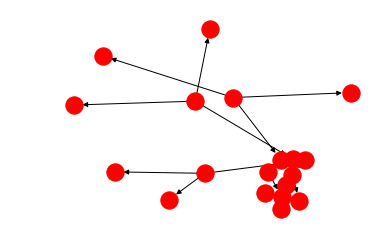

In [12]:
Rule6 = ctrl.Rule (US ['Tahap 2'] & BB ['Kurang Berat'] & TB ['Tinggi'], NG ['Gizi Buruk'])
Rule6.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x9537390>)

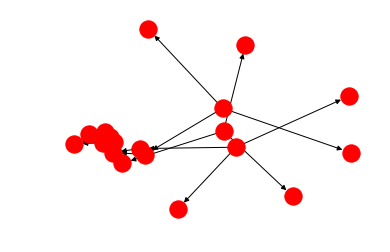

In [13]:
Rule7 = ctrl.Rule (US ['Tahap 3'] & BB ['Kurang Berat'] & TB ['Pendek'], NG ['Gizi Buruk'])
Rule7.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa7ea128>)

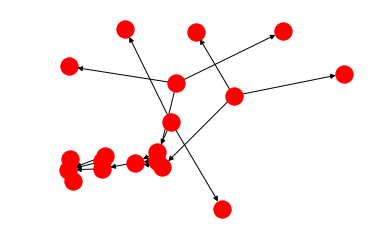

In [14]:
Rule8 = ctrl.Rule (US ['Tahap 3'] & BB ['Kurang Berat'] & TB ['Normal'], NG ['Gizi Buruk'])
Rule8.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa862b70>)

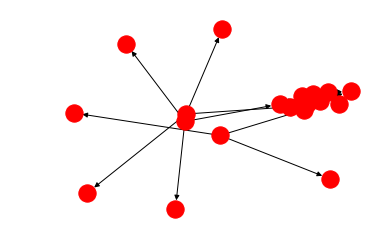

In [15]:
Rule9 = ctrl.Rule (US ['Tahap 3'] & BB ['Kurang Berat'] & TB ['Tinggi'], NG ['Gizi Buruk'])
Rule9.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa8d77f0>)

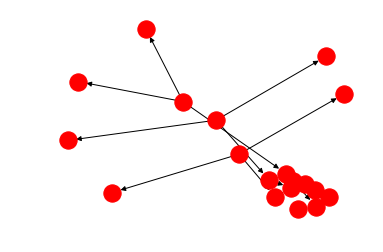

In [16]:
Rule10 = ctrl.Rule (US ['Tahap 1'] & BB ['Normal'] & TB ['Pendek'], NG ['Normal'])
Rule10.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa958080>)

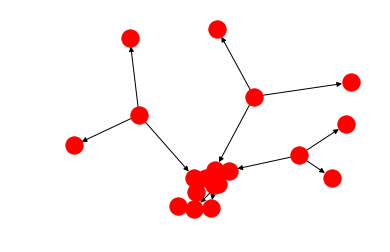

In [17]:
Rule11 = ctrl.Rule (US ['Tahap 1'] & BB ['Normal'] & TB ['Normal'], NG ['Normal'])
Rule11.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa9c6dd8>)

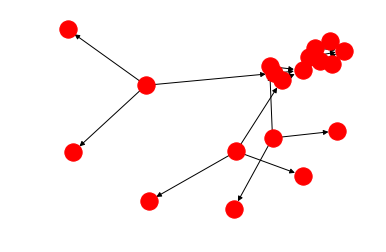

In [18]:
Rule12 = ctrl.Rule (US ['Tahap 1'] & BB ['Normal'] & TB ['Tinggi'], NG ['Normal'])
Rule12.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa9ac048>)

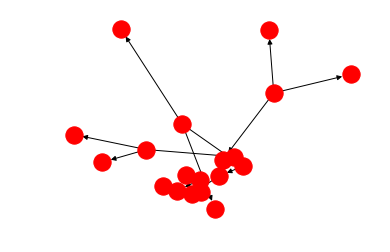

In [19]:
Rule13 = ctrl.Rule (US ['Tahap 2'] & BB ['Normal'] & TB ['Pendek'], NG ['Normal'])
Rule13.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xaab0b38>)

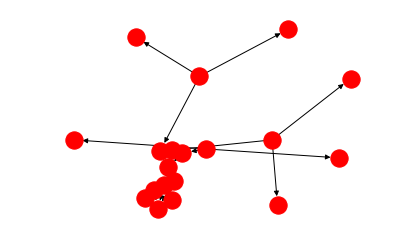

In [20]:
Rule14 = ctrl.Rule (US ['Tahap 2'] & BB ['Normal'] & TB ['Normal'], NG ['Normal'])
Rule14.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xab282e8>)

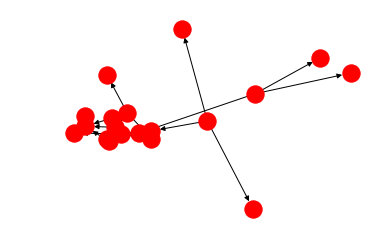

In [21]:
Rule15 = ctrl.Rule (US ['Tahap 2'] & BB ['Normal'] & TB ['Tinggi'], NG ['Normal'])
Rule15.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xbb70240>)

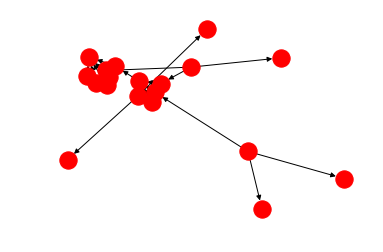

In [22]:
Rule16 = ctrl.Rule (US ['Tahap 3'] & BB ['Normal'] & TB ['Pendek'], NG ['Gizi Kurang'])
Rule16.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xbbec160>)

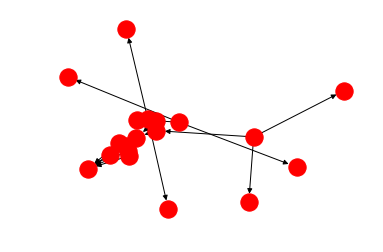

In [23]:
Rule17 = ctrl.Rule (US ['Tahap 3'] & BB ['Normal'] & TB ['Normal'], NG ['Gizi Kurang'])
Rule17.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xbc56dd8>)

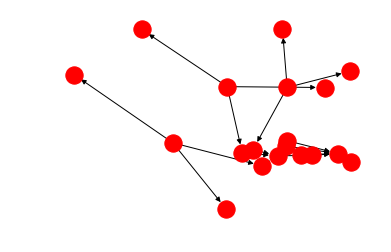

In [24]:
Rule18 = ctrl.Rule (US ['Tahap 3'] & BB ['Normal'] & TB ['Tinggi'], NG ['Gizi Kurang'])
Rule18.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xbccc780>)

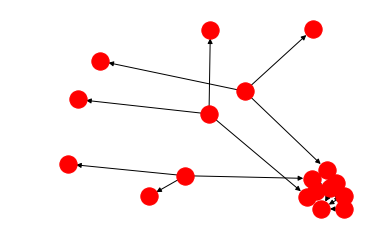

In [25]:
Rule19 = ctrl.Rule (US ['Tahap 1'] & BB ['Berat Lebih'] & TB ['Pendek'], NG ['Obesitas'])
Rule19.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xbcc30f0>)

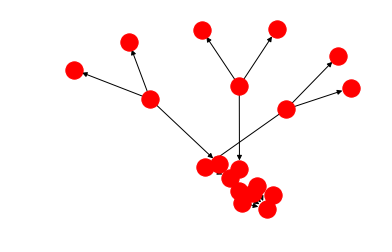

In [26]:
Rule20 = ctrl.Rule (US ['Tahap 1'] & BB ['Berat Lebih'] & TB ['Normal'], NG ['Gizi Lebih'])
Rule20.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xbd3a240>)

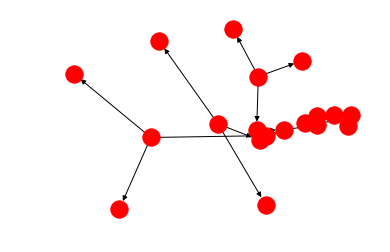

In [27]:
Rule21 = ctrl.Rule (US ['Tahap 1'] & BB ['Berat Lebih'] & TB ['Tinggi'], NG ['Obesitas'])
Rule21.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xbe31710>)

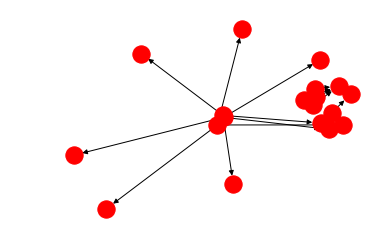

In [28]:
Rule22 = ctrl.Rule (US ['Tahap 2'] & BB ['Berat Lebih'] & TB ['Pendek'], NG ['Gizi Lebih'])
Rule22.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xbea91d0>)

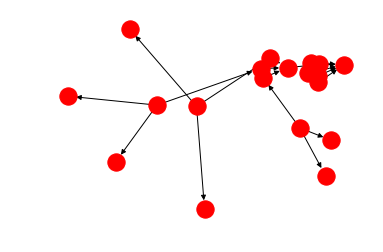

In [29]:
Rule23 = ctrl.Rule (US ['Tahap 2'] & BB ['Berat Lebih'] & TB ['Normal'], NG ['Gizi Lebih'])
Rule23.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xbf1d2b0>)

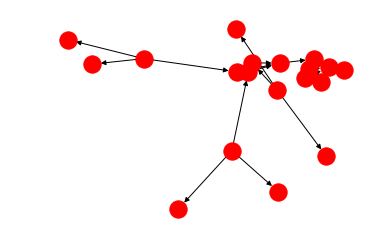

In [30]:
Rule24 = ctrl.Rule (US ['Tahap 2'] & BB ['Berat Lebih'] & TB ['Tinggi'], NG ['Obesitas'])
Rule24.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xbf95240>)

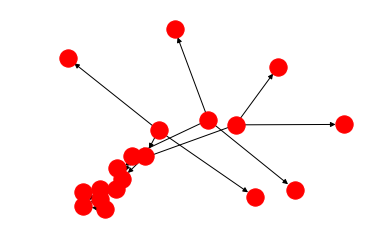

In [31]:
Rule25 = ctrl.Rule (US ['Tahap 3'] & BB ['Berat Lebih'] & TB ['Pendek'], NG ['Gizi Lebih'])
Rule25.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xbff4c18>)

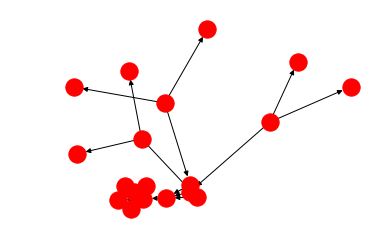

In [32]:
Rule26 = ctrl.Rule (US ['Tahap 3'] & BB ['Berat Lebih'] & TB ['Normal'], NG ['Gizi Lebih'])
Rule26.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc0845c0>)

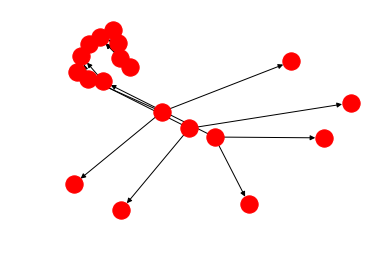

In [33]:
Rule27 = ctrl.Rule (US ['Tahap 3'] & BB ['Berat Lebih'] & TB ['Tinggi'], NG ['Normal'])
Rule27.view()

# 3. Proses Inferens

Inference : melakukan penalaran menggunakan fuzzy input dan fuzzy rules yang telah ditentukan sehingga menghasilkan fuzzy output. Pada umumnya aturan-aturan fuzzy dinyatakan dalam bentuk “IF THEN” yang merupakan inti dari relasi fuzzy.

1. IF Usia Tahap1 AND Berat Badan adalah Kurang Berat AND Tinggi Badan adalah Pendek THEN status gizinya adalah Gizi Kurang
2. IF Usia Tahap1 AND Berat Badan adalah Kurang Berat AND Tinggi Badan adalah Normal THEN status gizinya adalah Gizi Kurang
3. IF Usia Tahap1 AND Berat Badan adalah Kurang Berat AND Tinggi Badan adalah Tinggi THEN status gizinya adalah Gizi Kurang

4. IF Usia Tahap2 AND Berat Badan adalah Kurang Berat AND Tinggi Badan adalah Pendek THEN status gizinya adalah Gizi Buruk
5. IF Usia Tahap2 AND Berat Badan adalah Kurang Berat AND Tinggi Badan adalah Normal THEN status gizinya adalah Gizi Buruk
6. IF Usia Tahap2 AND Berat Badan adalah Kurang Berat AND Tinggi Badan adalah Tinggi THEN status gizinya adalah Gizi Buruk

7. IF Usia Tahap3 AND Berat Badan adalah Kurang Berat AND Tinggi Badan adalah Pendek THEN status gizinya adalah Gizi Buruk
8. IF Usia Tahap3 AND Berat Badan adalah Kurang Berat AND Tinggi Badan adalah Normal THEN status gizinya adalah Gizi Buruk
9. IF Usia Tahap3 AND Berat Badan adalah Kurang Berat AND Tinggi Badan adalah Tinggi THEN status gizinya adalah Gizi Buruk

10. IF Usia Tahap1 AND Berat Badan adalah Normal AND Tinggi Badan adalah Pendek THEN status gizinya adalah Normal
11. IF Usia Tahap1 AND Berat Badan adalah Normal AND Tinggi Badan adalah Normal THEN status gizinya adalah Normal
12. IF Usia Tahap1 AND Berat Badan adalah Normal AND Tinggi Badan adalah Tinggi THEN status gizinya adalah Normal

13. IF Usia Tahap2 AND Berat Badan adalah Normal AND Tinggi Badan adalah Pendek THEN status gizinya adalah Normal
14. IF Usia Tahap2 AND Berat Badan adalah Normal AND Tinggi Badan adalah Normal THEN status gizinya adalah Normal
15. IF Usia Tahap2 AND Berat Badan adalah Normal AND Tinggi Badan adalah Tinggi THEN status gizinya adalah Normal

16. IF Usia Tahap3 AND Berat Badan adalah Normal AND Tinggi Badan adalah Pendek THEN status gizinya adalah Gizi Kurang
17. IF Usia Tahap3 AND Berat Badan adalah Normal AND Tinggi Badan adalah Normal THEN status gizinya adalah Gizi Kurang
18. IF Usia Tahap3 AND Berat Badan adalah Normal AND Tinggi Badan adalah Tinggi THEN status gizinya adalah Gizi Kurang

19. IF Usia Tahap1 AND Berat Badan adalah Berat Lebih AND Tinggi Badan adalah Pendek THEN status gizinya adalah Obesitas
20. IF Usia Tahap1 AND Berat Badan adalah Berat Lebih AND Tinggi Badan adalah Normal THEN status gizinya adalah Gizi Lebih
21. IF Usia Tahap1 AND Berat Badan adalah Berat Lebih AND Tinggi Badan adalah Tinggi THEN status gizinya adalah Obesitas

22. IF Usia Tahap2 AND Berat Badan adalah Berat Lebih AND Tinggi Badan adalah Pendek THEN status gizinya adalah Gizi Lebih
23. IF Usia Tahap2 AND Berat Badan adalah Berat Lebih AND Tinggi Badan adalah Normal THEN status gizinya adalah Gizi Lebih
24. IF Usia Tahap2 AND Berat Badan adalah Berat Lebih AND Tinggi Badan adalah Tinggi THEN status gizinya adalah Obesitas

25. IF Usia Tahap3 AND Berat Badan adalah Berat Lebih AND Tinggi Badan adalah Pendek THEN status gizinya adalah Gizi Lebih
26. IF Usia Tahap3 AND Berat Badan adalah Berat Lebih AND Tinggi Badan adalah Normal THEN status gizinya adalah Gizi Lebih
27. IF Usia Tahap3 AND Berat Badan adalah Berat Lebih AND Tinggi Badan adalah Tinggi THEN status gizinya adalah Normal

# Control System

In [34]:
#membuat kontrol sistem yang kondisi nya diambil berdasarkan aturan/rule yang telah dibuat
Nilai_Gizi1 = ctrl.ControlSystem([Rule1, Rule2, Rule3, Rule4, Rule5, Rule6, Rule7, Rule8, Rule9, 
                                Rule10, Rule11, Rule12, Rule13, Rule14, Rule15, Rule16, Rule17, Rule18,
                                Rule19, Rule20, Rule21, Rule22, Rule23, Rule24, Rule25, Rule26, Rule27])

In [35]:
#membuat simulasi kontrol sistem yang kondisinya di ambil berdasarkan harga_rule1/sistem kontrol yg telah kita buat
Nilai_Gizi = ctrl.ControlSystemSimulation(Nilai_Gizi1)

# 4. Defuzzyfikasi
Defuzzifikasi digunakan menerjemahkan himpunan nilai keluaran ke dalam nilai yang tegas. Defuzzifikasi dapat didefinisikan sebagai proses pengubahan besaran fuzzy yang disajikan dalam bentuk himpunan-himpunan fuzzy keluaran dengan fungsi keanggotaannya untuk mendapatkan kembali bentuk tegasnya (crisp). 

In [40]:
#membuat interupsi yang meminta inputan dari keyboard
nilaiUS = input('Usia :') #membuat inputan untuk nilai usia           
nilaiBB = input('Berat Badan: ') #membuat inputan untuk nilai berat badan
nilaiTB= input('Tinggi Badan: ') #membuat inputan untuk nilai tinggi badan

Usia :15
Berat Badan: 18
Tinggi Badan: 40


In [41]:
Nilai_Gizi.input['Usia'] = float(nilaiUS) #merubah format data nilaiUS menjadi float, dan memasukkannya kedalam kontrol sistem berdasarkan kondisi yang telah dibuat
Nilai_Gizi.input['Berat Badan'] = float(nilaiBB) #merubah format data nilaiBB menjadi float, dan memasukkannya kedalam kontrol sistem berdasarkan kondisi yang telah dibuat
Nilai_Gizi.input['Tinggi Badan'] = float(nilaiTB) #merubah format data nilaiTB menjadi float, dan memasukkannya kedalam kontrol sistem berdasarkan kondisi yang telah dibuat

Nilai_Gizi.compute() #menghitung jumlahnya

98.41976519781281


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


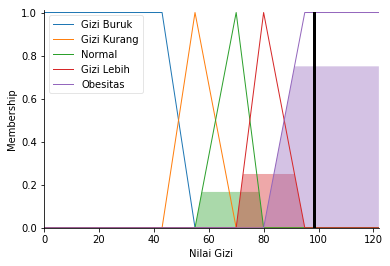

In [42]:
print(Nilai_Gizi.output['Nilai Gizi']) #mencetak output Nilai Gizi berdasarkan kondisi yg telah di penuhi
NG.view(sim=Nilai_Gizi)#membuat plot/grafik dari Nilai Gizi dengan kondisi berada pada harga_Rule yang telah terpenuhi

$$z=\frac{\alpha pred_1 * z_1 + \alpha pred_2 * z_2 + ... + \alpha pred_n * z_n}{\alpha pred_1 + \alpha pred_2 + ... + \alpha pred_n}$$

a-pred_n= keadaan pada saat rule_n z_n = keadaan pada saat rule terjadi.
Z adalah konversi nilai Fuzzy Output sesuai dengan Rule Base System yang telah dihitung sebelumnya

In [44]:
#mentukan predikat dan z menggunakan rumus fuzzy logic sesuai pada saat keadaan yang terpenuhi
#usia = 15
#berat badan = 18
#tinggi badan = 40

$$z=\frac{0,57 * 0 + 58 * 0,08 + (59-71) * 0,19 + (72-82) * 0,28 + 83 * 0,32 + 84 * 0,36 + 85 * 0,40 + 86 * 0,44 + 87 * 0,48 + 88 * 0,52 + 89 * 0,56 + 90 * 0,60 + 91 * 0,64 + 92 * 0,68 + 93 * 0,72 + 94 * 0,76 + (95-120) * 0,78}{(58 * 0) + 0,08 + (13 * 0,19)+ (11 * 0,28) + 0,32 + 0,36 + 0,40 + 0,44 + 0,48 + 0,52 + 0,56 + 0,60 + 0,64 + 0,68 + 0,72 + 0,76 + (26 * 0,78)}$$

$$z=\frac{4,64 + 160,55 + 237,6 + 26,56 + 30,24 + 34 + 37,84 + 41,76 + 49,84 + 54 + 58,24 + 62,56 + 66,96 + 71,44}{32.39}$$

$$z=\frac{3.197,99}{32,39}$$

$$z=98,7338685$$

Sumber https://ejournal.bsi.ac.id/ejurnal/index.php/ji/article/view/2440